# Recommendation System

## About the Dataset

The **MovieLens 20M dataset** is a benchmark dataset for building recommendation systems. It consists of over **20 million user ratings** for movies, collected from the MovieLens website. The dataset includes movie information, user ratings, tags, and tag relevance scores, making it suitable for both collaborative and content-based recommendation systems.

**Files Included:**
- `movie.csv`: Movie titles and genres.
- `rating.csv`: Ratings given by users to movies.
- `tag.csv`: User-generated tags for specific movies.
- `genome_tags.csv`: A controlled set of tag labels.
- `genome_scores.csv`: Relevance of tags for each movie.
- `link.csv`: Mapping of MovieLens IDs to IMDb and TMDb.

---

## Objective

The goal of this project is to develop a professional **Movie Recommendation System**. The system will use user rating patterns to suggest movies users might enjoy.

This project demonstrates how machine learning can personalize content for users and improve user experience in media platforms.


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
ratings = pd.read_csv('rating.csv')
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
links = pd.read_csv('link.csv')

In [3]:
print("Ratings:")
print(ratings.head(), '\n')

Ratings:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40 



In [4]:
print("Movies:")
print(movies.head(), '\n')

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   



In [5]:
print("Tags:")
print(tags.head(), '\n')

Tags:
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18 



In [6]:
print("Genome Tags:")
print(genome_tags.head(), '\n')

Genome Tags:
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s 



In [7]:
print("Genome Scores:")
print(genome_scores.head(), '\n')

Genome Scores:
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675 



In [8]:
print("Links:")
print(links.head())

Links:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [10]:
ratings.describe().round(2)

,userId,movieId,rating
count,20000263.00,20000263.00,20000263.00
mean,69045.87,9041.57,3.53
std,40038.63,19789.48,1.05
min,1.00,1.00,0.50
25%,34395.00,902.00,3.00
50%,69141.00,2167.00,3.50
75%,103637.00,4770.00,4.00
max,138493.00,131262.00,5.00


In [11]:
ratings.describe(include='object')

,timestamp
count,20000263
unique,15351121
top,1996-03-01 00:00:00
freq,643


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [13]:
movies.describe().round(2)

,movieId
count,27278.00
mean,59855.48
std,44429.31
min,1.00
25%,6931.25
50%,68068.00
75%,100293.25
max,131262.00


In [14]:
movies.describe(include='object')

,title,genres
count,27278,27278
unique,27262,1342
top,Aladdin (1992),Drama
freq,2,4520


In [15]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB


In [16]:
tags.describe().round(2)

,userId,movieId
count,465564.00,465564.00
mean,68712.35,32627.76
std,41877.67,36080.24
min,18.00,1.00
25%,28780.00,2571.00
50%,70201.00,7373.00
75%,107322.00,62235.00
max,138472.00,131258.00


In [17]:
tags.describe(include='object')

,tag,timestamp
count,465548,465564
unique,38643,425373
top,sci-fi,2010-08-25 17:56:41
freq,3384,22


In [18]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [19]:
genome_tags.describe().round(2)

,tagId
count,1128.00
mean,564.50
std,325.77
min,1.00
25%,282.75
50%,564.50
75%,846.25
max,1128.00


In [20]:
genome_tags.describe(include='object')

,tag
count,1128
unique,1128
top,007
freq,1


In [21]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


In [22]:
genome_scores.describe().round(2)

,movieId,tagId,relevance
count,11709768.00,11709768.00,11709768.00
mean,25842.97,564.50,0.12
std,34676.15,325.63,0.15
min,1.00,1.00,0.00
25%,2926.00,282.75,0.02
50%,6017.00,564.50,0.06
75%,46062.00,846.25,0.14
max,131170.00,1128.00,1.00


In [23]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


In [24]:
links.describe().round(2)

,movieId,imdbId,tmdbId
count,27278.00,27278.00,27026.00
mean,59855.48,578185.96,63846.68
std,44429.31,780470.68,69862.13
min,1.00,5.00,2.00
25%,6931.25,77417.25,15936.50
50%,68068.00,152435.00,39468.50
75%,100293.25,906271.50,82504.00
max,131262.00,4530184.00,421510.00


## Data Preprocessing

### 1. Check **Duplicates**

In [25]:
ratings.duplicated().sum()

0

In [26]:
movies.duplicated().sum()

0

In [27]:
tags.duplicated().sum()

0

In [28]:
genome_tags.duplicated().sum()

0

In [29]:
genome_scores.duplicated().sum()

0

In [30]:
links.duplicated().sum()

0

### 2. Check **Missing Values**

In [31]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [32]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [33]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [34]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [35]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [36]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     252
dtype: int64

#### Remove **Nulls**

In [37]:
tags.dropna(inplace=True)
links.dropna(inplace=True)

### 3. Handle **datatime** type

In [38]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], errors='coerce')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], errors='coerce')

In [39]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [40]:
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Rating Distribution Analysis

Text(0.5, 1.0, 'Distribution of Movie Ratings')

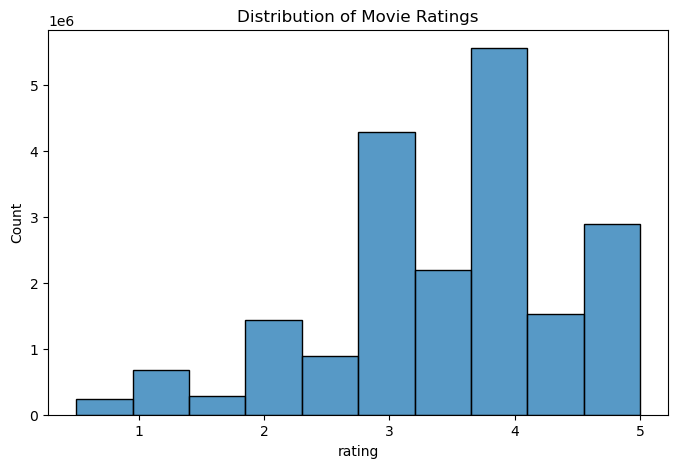

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Distribution of Movie Ratings")

#### This figure show that the most popular ratings from *3.8 to 4.1*

### User Activity (Ratings per User)

Text(0, 0.5, 'Number of Users')

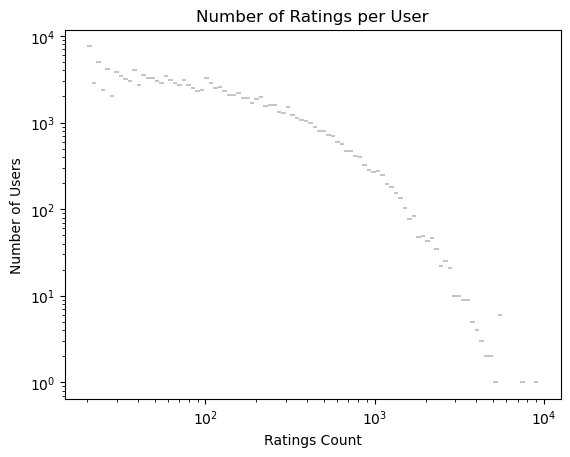

In [46]:
user_activity = ratings.groupby('userId').size()
sns.histplot(user_activity, bins=100, log_scale=(True, True))
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Users")

### Movie Popularity (Ratings per Movie)

Text(0, 0.5, 'Number of Movies')

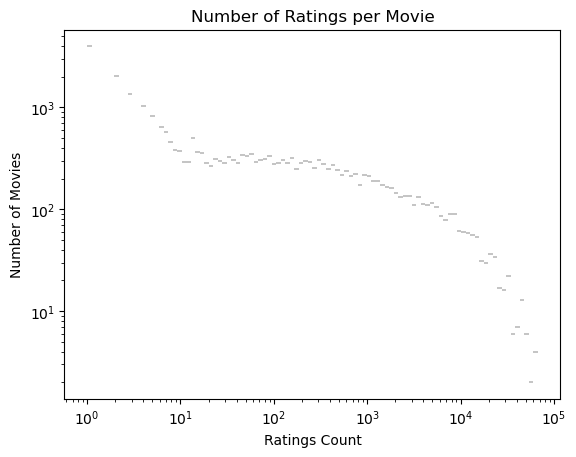

In [47]:
movie_popularity = ratings.groupby('movieId').size()
sns.histplot(movie_popularity, bins=100, log_scale=(True, True))
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Movies")

### Merge with movies.csv and Analyze Genres

In [48]:
merged = ratings.merge(movies, on='movieId')

In [49]:
from collections import Counter

In [50]:
# Split genres and count
genre_counts = Counter()
for genres in merged['genres']:
    for g in genres.split('|'):
        genre_counts[g] += 1

Text(0, 0.5, 'Number of Ratings')

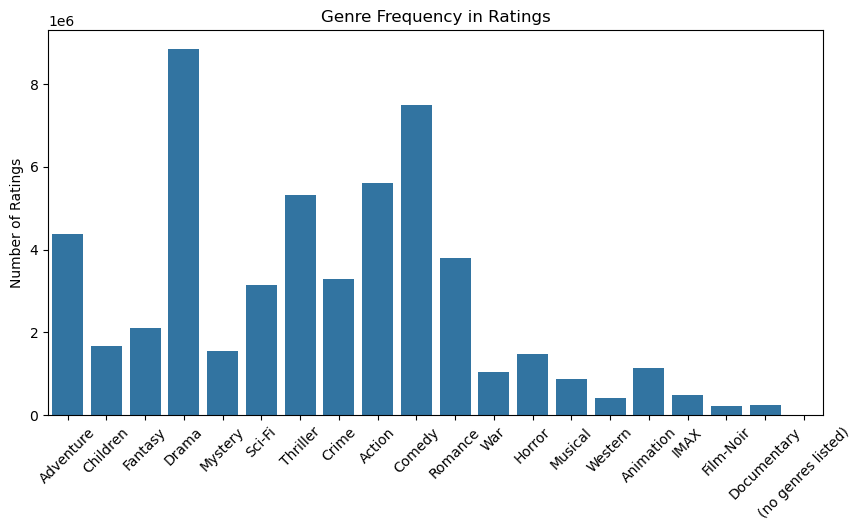

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Genre Frequency in Ratings")
plt.ylabel("Number of Ratings")

#### This figure show that most of ratings is from **Drama & Comedy** movies

### Average Rating per Genre or Movie

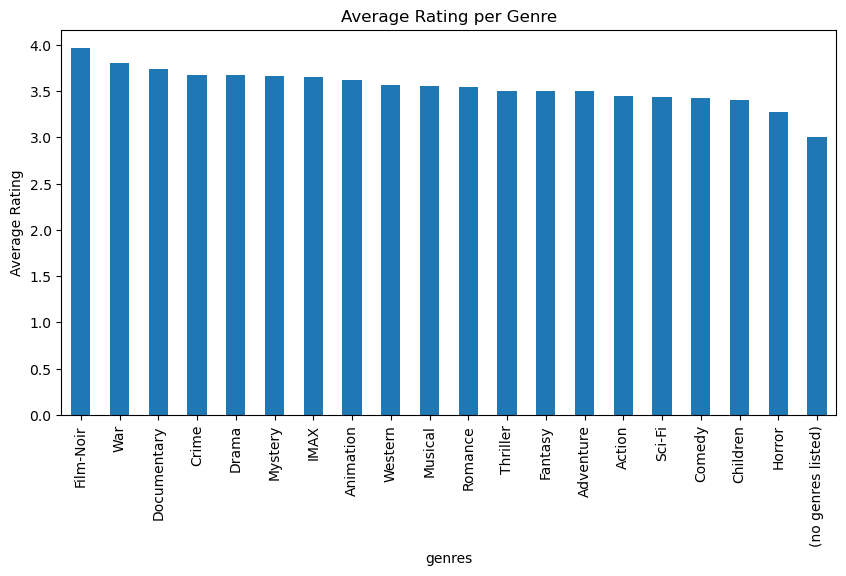

In [52]:
genre_avg = merged.copy()
genre_avg['genres'] = genre_avg['genres'].str.split('|')
genre_avg = genre_avg.explode('genres')

avg_rating_per_genre = genre_avg.groupby('genres')['rating'].mean().sort_values(ascending=False)

avg_rating_per_genre.plot(kind='bar', figsize=(10,5), title='Average Rating per Genre')
plt.ylabel("Average Rating")
plt.show()

### Check User-Movie Rating Matrix Sparsity
Sparsity is very important in collaborative filtering.

In [53]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)

sparsity = 1 - (num_ratings / (num_users * num_movies))
print(f"Matrix Sparsity: {sparsity:.4f}")

Matrix Sparsity: 0.9946


#### means that only 0.54% of all possible user–movie rating combinations exist, and 99.46% are missing.

### Explore trends over time.

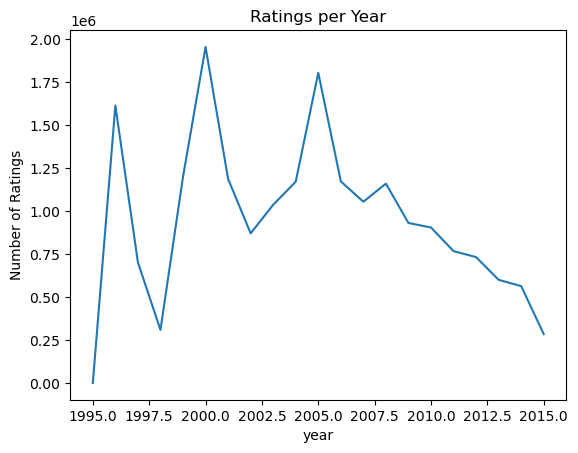

In [56]:
ratings['year'] = ratings['timestamp'].dt.year

ratings.groupby('year')['rating'].count().plot(kind='line', title='Ratings per Year')
plt.ylabel("Number of Ratings")
plt.show()

### This figure show that **2000** is most year has Ratings

## Building a Collaborative Filtering Model (SVD)
We’ll use the **Surprise** library, which is specifically built for **recommender systems**.

#### **SVD** is a matrix factorization technique that decomposes a user-item interaction matrix into lower-dimensional representations, allowing for predictions of user preferences. 

In [57]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

### 1. Define a Reader
Surprise needs this to understand rating scale

In [58]:
reader = Reader(rating_scale=(0.5, 5.0))

### 2. Load the dataset into **Surprise** format

In [59]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

#### Surprise works by learning from **user behavior** — not metadata — so it doesn't need genre, tags, or titles. That’s by design.

### 3. Quick check with cross-validation using **Singular Value Decomposition (SVD)**

In [62]:
from surprise import SVD

In [63]:
svd_model = SVD()
print("Evaluating model with 5-fold cross-validation...")
cv_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating model with 5-fold cross-validation...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7858  0.7861  0.7859  0.7858  0.7858  0.7859  0.0001  
MAE (testset)     0.5978  0.5982  0.5980  0.5979  0.5978  0.5980  0.0002  
Fit time          224.51  230.78  230.81  231.51  230.74  229.67  2.60    
Test time         59.39   70.11   83.56   77.83   70.55   72.29   8.15    


### 4. Split into train and test sets

In [60]:
from surprise.model_selection import train_test_split

In [61]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

### 5. Modelling

#### Training

In [64]:
final_model = SVD()
final_model.fit(trainset)

#### Evaluation

In [65]:
from surprise import accuracy

In [66]:
predictions = final_model.test(testset)

In [67]:
print("Final Model Performance:")
print("RMSE:", round(accuracy.rmse(predictions), 4))
print("MAE:", round(accuracy.mae(predictions), 4))

Final Model Performance:
RMSE: 0.7866
RMSE: 0.7866
MAE:  0.5982
MAE: 0.5982


### Saving

In [71]:
from joblib import dump

dump(final_model, 'svd_trained_model.joblib')

['svd_trained_model.joblib']

### Generate Top 10 Movie Recommendations per User

In [68]:
from collections import defaultdict

#### 1. Get all user-movie pairs NOT in training set

In [72]:
trainset_user_items = trainset.build_anti_testset()

MemoryError: 

#### 2. Predict ratings for those unseen movies

In [ ]:
predictions = final_model.test(trainset_user_items)

#### 3. Function to get Top-N recommendations

In [ ]:
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    
    # Group predictions by user
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    
    # Sort and get top-n for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

#### 4. Get Top 10 movie recommendations for each user

In [ ]:
top_n_recommendations = get_top_n(predictions, n=10)

#### Example: Show top 10 recommendations for **user 1**

In [ ]:
# Create mapping: movieId -> title
movie_id_to_title = dict(zip(movies['movieId'], movies['title']))

# Print User 1's top 10 movie titles
print(f"\nTop 10 movie recommendations for User 1 (with titles):")
for movie_id, score in top_n_recommendations[1]:
    title = movie_id_to_title.get(movie_id, "Unknown Movie")
    print(f"{title} (Predicted Rating: {round(score, 2)})")

## Reconnect

### Generate Top 10 Movie Recommendations per User 1

In [1]:
import pandas as pd
from joblib import load
from surprise import Dataset, Reader

In [2]:
# Load the saved model
final_model = load('svd_trained_model.joblib')

In [4]:
# Reload the ratings data again
ratings = pd.read_csv('rating.csv')
movies = pd.read_csv('movie.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [5]:
# Rebuild trainset from the same data to allow predictions
trainset = data.build_full_trainset()

In [6]:
from collections import defaultdict

In [7]:
# Get the raw ID of user 1 (in case Surprise is using internal mapping)
raw_user_id = 1
inner_user_id = trainset.to_inner_uid(raw_user_id)

In [8]:
# Get all movie IDs rated by user 1
user_rated_items = set(j for (j, _) in trainset.ur[inner_user_id])

In [9]:
# Build anti-testset manually just for user 1
user_anti_testset = [
    (raw_user_id, trainset.to_raw_iid(i), 0.0)
    for i in trainset.all_items()
    if i not in user_rated_items
]

In [10]:
# Get predictions only for user 1
user_predictions = final_model.test(user_anti_testset)

In [11]:
# Same get_top_n logic, but only for 1 user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [12]:
top_n_user1 = get_top_n(user_predictions, n=10)

In [13]:
# Load movieId-to-title mapping (assuming you already loaded `movies`)
movie_id_to_title = dict(zip(movies['movieId'], movies['title']))

In [14]:
# Print recommendations
print(f"\nTop 10 movie recommendations for User {raw_user_id}:")
for movie_id, score in top_n_user1[raw_user_id]:
    title = movie_id_to_title.get(int(movie_id), "Unknown Movie")
    print(f"{title} (Predicted Rating: {round(score, 2)})")


Top 10 movie recommendations for User 1:
Frozen Planet (2011) (Predicted Rating: 4.54)
Black Mirror (2011) (Predicted Rating: 4.52)
The Imitation Game (2014) (Predicted Rating: 4.46)
Connections (1978) (Predicted Rating: 4.46)
For the Birds (2000) (Predicted Rating: 4.42)
Bleak House (2005) (Predicted Rating: 4.42)
Personal Journey with Martin Scorsese Through American Movies, A (1995) (Predicted Rating: 4.4)
Crucified Lovers, The (Chikamatsu monogatari) (1954) (Predicted Rating: 4.4)
Zero Motivation (Efes beyahasei enosh) (2014) (Predicted Rating: 4.38)
Hobbit: An Unexpected Journey, The (2012) (Predicted Rating: 4.36)


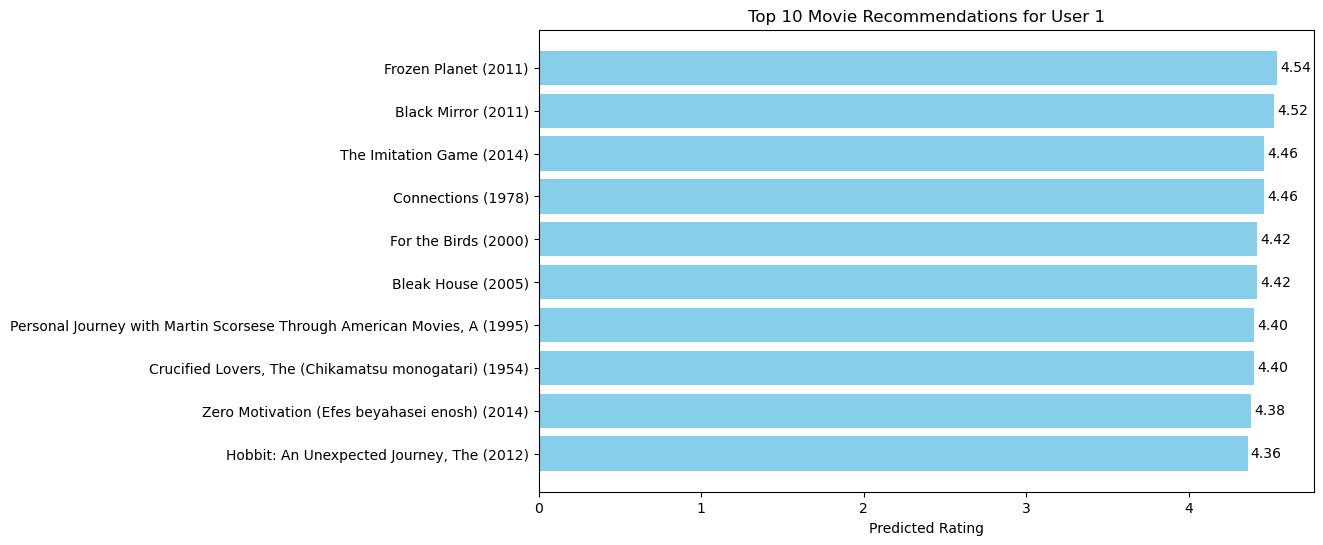

In [17]:
import matplotlib.pyplot as plt

# Extract movie titles and predicted ratings for User 1
user_1_recs = top_n_user1[raw_user_id]
movie_titles = [movie_id_to_title.get(mid, "Unknown") for mid, _ in user_1_recs]
predicted_scores = [round(score, 2) for _, score in user_1_recs]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(movie_titles, predicted_scores, color='skyblue')
plt.xlabel('Predicted Rating')
plt.title('Top 10 Movie Recommendations for User 1')
plt.gca().invert_yaxis()  # Highest rating on top

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

#### Save Top 10 for First User

In [19]:
import csv

# Save User 1's top 10 recommendations to CSV
with open('top_10_recommendations_user1.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['userId', 'movieId', 'predicted_rating', 'title'])

    user_id = raw_user_id  # or 1, depending on how you defined it earlier
    user_ratings = top_n_user1[user_id]

    for movie_id, pred_rating in user_ratings:
        title = movie_id_to_title.get(int(movie_id), "Unknown Movie")
        writer.writerow([user_id, movie_id, round(pred_rating, 2), title])

### Generate Top 10 Movie Recommendations for All users

In [23]:
from surprise import Dataset, Reader
from joblib import load
import pandas as pd
from collections import defaultdict
import csv

# Load trained model
final_model = load('svd_trained_model.joblib')

# Load ratings & movies
ratings = pd.read_csv('rating.csv')
movies = pd.read_csv('movie.csv')
movie_id_to_title = dict(zip(movies['movieId'], movies['title']))

# Prepare trainset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# Get all unique user and movie IDs
all_user_ids = ratings['userId'].unique()
all_movie_ids = ratings['movieId'].unique()

# Save recommendations in a CSV
with open('top_10_recommendations_all_users.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['userId', 'movieId', 'predicted_rating', 'title'])

    for raw_user_id in all_user_ids:
        # Movies already rated by the user
        rated_movies = set(ratings[ratings['userId'] == raw_user_id]['movieId'])

        # Unrated movies for this user
        unrated_movies = [mid for mid in all_movie_ids if mid not in rated_movies]

        user_predictions = []
        for movie_id in unrated_movies:
            pred = final_model.predict(str(raw_user_id), str(movie_id))
            user_predictions.append((movie_id, pred.est))

        # Get top 10 predictions
        user_predictions.sort(key=lambda x: x[1], reverse=True)
        top_10 = user_predictions[:10]

        # Write to CSV
        for movie_id, rating in top_10:
            title = movie_id_to_title.get(int(movie_id), "Unknown")
            writer.writerow([raw_user_id, movie_id, round(rating, 2), title])

PermissionError: [Errno 13] Permission denied

## Content-Based Filtering

### 1. Prepare movie content
We'll use TF-IDF or CountVectorizer on genres (and tags if available):

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')

# Replace '|' with space in genres
movies['processed_genres'] = movies['genres'].str.replace('|', ' ')

# Combine tags per movie
tags['tag'] = tags['tag'].astype(str)
tag_grouped = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# Merge with movies
movies = movies.merge(tag_grouped, on='movieId', how='left')
movies['text'] = movies['processed_genres'] + ' ' + movies['tag'].fillna('')

In [11]:
# Vectorize genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['text'])

In [12]:
# Compute cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

### 2. Build movie title → index mapping

In [13]:
# Mapping from movie title to index
indices = pd.Series(movies.index, index=movies['title'])

### 3. Define recommendation function

In [14]:
def content_recommendations(title, n=10):
    if title not in indices:
        print("Title not found.")
        return

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies[['title', 'genres']].iloc[movie_indices]

In [15]:
content_recommendations("Toy Story (1995)", n=10)

,title,genres
3027,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2270,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy
4790,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
5121,Ice Age (2002),Adventure|Animation|Children|Comedy
6271,Finding Nemo (2003),Adventure|Animation|Children|Comedy
15401,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
8278,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy
11614,Ratatouille (2007),Animation|Children|Drama
19186,Tin Toy (1988),Animation|Children
25462,The Legend of Mor'du (2012),Animation|Children
